In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import scipy.linalg
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.sandbox.stats.multicomp as smm
import statsmodels.tsa.stattools as tsa

import matplotlib.pyplot as plt
import seaborn as sns

/home/hflores/anaconda2/envs/electrickaust/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('../data/data_set_A.CSV')

In [4]:
df

,DATE,TIME,LOAD(10MW)
0,2009/1/1,0:00,2892
1,2009/1/1,1:00,2695
2,2009/1/1,2:00,2537
3,2009/1/1,3:00,2411
4,2009/1/1,4:00,2337
5,2009/1/1,5:00,2337
6,2009/1/1,6:00,2437
7,2009/1/1,7:00,2605
8,2009/1/1,8:00,2779
9,2009/1/1,9:00,2797


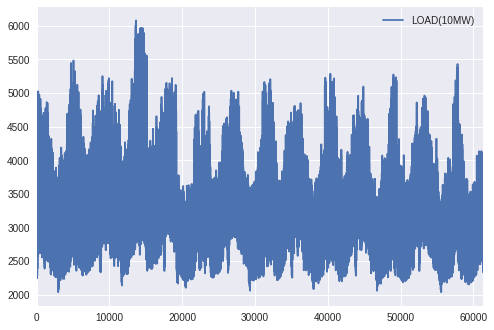

In [5]:
df.plot()

In [6]:
df2 = pd.read_csv('../data/jpn_weather/2017-06-23-09:44:32.csv')

In [8]:
df2.set_index(['state', 'city'])

latitude   longitude  altitude                 time  \
state    city                                                                 
Ibaraki  Hanazono      36.866944  140.633889       370   2017-06-22 1:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 2:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 3:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 4:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 5:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 6:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 7:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 8:00:00   
         Hanazono      36.866944  140.633889       370   2017-06-22 9:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 10:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 11:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 12:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 13:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 14:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 15:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 16:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 17:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 18:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 19:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 20:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 21:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 22:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 23:00:00   
         Hanazono      36.866944  140.633889       370  2017-06-22 24:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 1:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 2:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 3:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 4:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 5:00:00   
         Kita-ibaraki  36.833333  140.767500         5   2017-06-22 6:00:00   
...                          ...         ...       ...                  ...   
Shizuoka Omaezaki      34.600556  138.201944        45  2017-06-22 19:00:00   
         Omaezaki      34.600556  138.201944        45  2017-06-22 20:00:00   
         Omaezaki      34.600556  138.201944        45  2017-06-22 21:00:00   
         Omaezaki      34.600556  138.201944        45  2017-06-22 22:00:00   
         Omaezaki      34.600556  138.201944        45  2017-06-22 23:00:00   
         Omaezaki      34.600556  138.201944        45  2017-06-22 24:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 1:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 2:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 3:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 4:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 5:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 6:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 7:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 8:00:00   
         Irozaki       34.600556  138.834722        52   2017-06-22 9:00:00   
         Irozaki       34.600556  138.834722        52  2017-06-22 10:00:00   
         Irozaki       34.600556  138.834722        52  2017-06-22 11:00:00   
         Irozaki       34.600556  138.834722        52  2017-06-22 12:00:0

In [32]:
cities = list(df2.city.unique())

In [33]:
cities = [c.upper() for c in cities]

In [42]:
states = list(df2.state.unique())

In [43]:
states = [s.upper() for s in states]

In [34]:
cities

['HANAZONO',
 'KITA-IBARAKI',
 'DAIGO',
 'TOKUDA',
 'OHNOH',
 'TAKAHAGI',
 'HITACHIOMIYA',
 'NAKANO',
 'HITACHI',
 'KADOI',
 'KASAMA',
 'MITO',
 'KOGA',
 'SHIMODATE',
 'KAKIOKA',
 'MINORI',
 'SHIMOTSUMA',
 'JOSO',
 'HOKOTA',
 'BANDO',
 'TSUKUBA',
 'TSUCHIURA',
 'EDOSAKI',
 'KASHIMA',
 'RYUGASAKI',
 'NASU-KOGEN',
 'IKARI',
 'KUROISO',
 'DOROBU',
 'OTAWARA',
 'OKUNIKKO',
 'IMAICHI',
 'SHIOYA',
 'ASHIO',
 'TAKANEZAWA',
 'NASU-KARASUYAMA',
 'KANUMA',
 'UTSUNOMIYA',
 'KUZU',
 'MO-OKA',
 'ASHIKAGA',
 'SANO',
 'TOCHIGI',
 'OYAMA',
 'FUJIWARA',
 'MINAKAMI',
 'KATASHINA',
 'KUSATSU',
 'NUMATA',
 'NAKANOJO',
 'TASHIRO',
 'HARUNASAN',
 'MAEBASHI',
 'KUROHONE',
 'KIRYU',
 'KAMISATOMI',
 'ISESAKI',
 'NISHI-NOMAKI',
 'FUJIOKA',
 'TATEBAYASHI',
 'KANNA',
 'YORII',
 'KUMAGAYA',
 'KAMIYOSHIDA',
 'KONOSU',
 'KUKI',
 'MITSUMINE',
 'CHICHIBU',
 'URAYAMA',
 'TOKIGAWA',
 'HATOYAMA',
 'HANNO',
 'SAITAMA',
 'KOSHIGAYA',
 'TOKOROZAWA',
 'ABIKO',
 'KATORI',
 'TONOSHO',
 'FUNABASHI',
 'SAKURA',
 'NARITA',
 'CHOS

In [11]:
import re
import requests
from bs4 import BeautifulSoup

In [12]:
url = 'http://www.data.jma.go.jp/obd/stats/data/en/smp/index.html'

In [13]:
def get_soup(url):
    page = requests.get(url)
    return BeautifulSoup(page.content, 'html.parser')

In [14]:
soup = get_soup(url)

In [19]:
cityid = pd.read_table('/home/hflores/cities.txt', sep=',')

In [20]:
cityid

,id,station
0,47401,WAKKANAI
1,47402,KITAMIESASHI
2,47404,HABORO
3,47405,OMU
4,47406,RUMOI
5,47407,ASAHIKAWA
6,47409,ABASHIRI
7,47411,OTARU
8,47412,SAPPORO
9,47413,IWAMIZAWA


In [24]:
stations = set(cityid.station.values)

In [35]:
cities = set(cities)

In [37]:
x = stations.intersection(cities)

In [39]:
len(x)

24

In [40]:
len(cities)

171

In [41]:
len(stations)

168

In [44]:
states = set(states)

In [45]:
stations.intersection(states)

{'CHIBA', 'SHIZUOKA', 'TOKYO'}

In [46]:
x

{'AJIRO',
 'CHIBA',
 'CHICHIBU',
 'CHICHIJIMA',
 'CHOSHI',
 'FUJISAN',
 'HACHIJOJIMA',
 'HAMAMATSU',
 'IROZAKI',
 'KATSUURA',
 'KOFU',
 'KUMAGAYA',
 'MAEBASHI',
 'MISHIMA',
 'MITO',
 'MIYAKEJIMA',
 'OMAEZAKI',
 'OSHIMA',
 'SHIMIZU',
 'SHIZUOKA',
 'TATEYAMA',
 'TOKYO',
 'UTSUNOMIYA',
 'YOKOHAMA'}

In [47]:
'KIKUGAWA' in stations

False

In [53]:
'HIKARI' in stations

False

In [54]:
cityid = cityid[]

,id,station
0,47401,WAKKANAI
1,47402,KITAMIESASHI
2,47404,HABORO
3,47405,OMU
4,47406,RUMOI
5,47407,ASAHIKAWA
6,47409,ABASHIRI
7,47411,OTARU
8,47412,SAPPORO
9,47413,IWAMIZAWA


In [56]:
mystations = cityid[cityid['station'].isin(x)]

In [57]:
mystations

,id,station
48,47615,UTSUNOMIYA
55,47624,MAEBASHI
56,47626,KUMAGAYA
58,47629,MITO
63,47638,KOFU
64,47639,FUJISAN
66,47641,CHICHIBU
68,47648,CHOSHI
73,47654,HAMAMATSU
74,47655,OMAEZAKI


In [62]:
block_no = list(mystations.id.values)

In [63]:
block_no

[47615,
 47624,
 47626,
 47629,
 47638,
 47639,
 47641,
 47648,
 47654,
 47655,
 47656,
 47657,
 47662,
 47666,
 47668,
 47670,
 47672,
 47674,
 47675,
 47677,
 47678,
 47682,
 47898,
 47971]

In [60]:
views = list(range(1,15))

In [61]:
views

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [64]:
dataurl = 'http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?'

In [65]:
test = get_soup('http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?block_no=47409&view=1')

In [70]:
data = test.findAll(class_='mtx')

In [87]:
z = test.find_all(class_='data_0_0_0_0')

In [88]:
z

[<td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">　</td>,
 <td class="data_0_0_0_0">19.3</td>,
 <td class="data_0_0_0_0">13.5</td>,
 <td class="data_0_0_0_0">7.0</td>,
 <td class="data_0_0_0_0">0.9</td>,
 <td class="data_0_0_0_0">-3.8</td>,
 <td class="data_0_0_0_0">7.4 ]</td>,
 <td class="data_0_0_0_0">-9.3</td>,
 <td class="data_0_0_0_0">-6.9</td>,
 <td class="data_0_0_0_0">-2.2</td>,
 <td class="data_0_0_0_0">5.4</td>,
 <td class="data_0_0_0_0">9.5</td>,
 <td class="data_0_0_0_0">11.5</td>,
 <td class="data_0_0_0_0">17.6</td>,
 <td class="data_0_0_0_0">21.9</td>,
 <td class="data_0_0_0_0">19.0</td>,
 <td class="data_0_0_0_0">9.8</td>,
 <td class="data_0_0_0_0">4.1</td>,
 <td class="data_0_0_0_0">0.6</td>,
 <td class="data_0_0_0_0">6.8</td>,
 <td class="data_0_0_0_0">-7.7</td>,
 <td class="data_0_0_0_0">-6.

In [93]:
z[20].text

'21.9'

In [97]:
z[120*13].text

'-2.8'